# Кластеризация ЕГЭ (4 если сделаны все задачи)

Рядом лежат данные с координатами точек. Везде используется Евклидово расстояние. Кластером считается набор не менее чем из 30 точек связанных друг с другом. Аномалия это точка находящаяся на расстоянии более 1 от любого кластера.

* Постройте Распределение точек
* Напишите руками DBSCAN и обработайте им все файлы
* Файл 0.xls также решите руками
* Постройте Распределение точек, отметьте принадлежность кластеров цветами
* Отметьте Аномалии отдельным цветом
* Найдите среди в каждом кластере точку расстояние от которой до всех остальных минимально
* Выведите два числа - Среднее абсцисс и ординат центроидов кластеров * 100000

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from queue import Queue
from math import sqrt

def check_point_position(x1, y1, x2, y2, x, y):
    prod = (x2 - x1) * (y - y1) - (y2 - y1) * (x - x1)
    if prod > 0:
        return 'red'
    elif prod < 0:
        return 'blue'

def dist(A, B):
  return sqrt((A[0] - B[0]) * (A[0] - B[0]) + (A[1] - B[1]) * (A[1] - B[1]))

def DBScan(points):
  cl1 = []
  cl2 = []
  cl3 = []
  anom = []
  n = len(points)
  used = [0] * n
  for i in range(n):
    cur = []
    if not used[i]:
      used[i] = 1
      q = Queue()
      q.put(i)
      cur.append(i)
      while not q.empty():
        point = q.get()
        for j in range(n):
          if not used[j] and point != j and dist(points[point], points[j]) <= 1:
            cur.append(j)
            q.put(j)
            used[j] = 1
    if len(cur) >= 30:
        if len(cl1) == 0:
          cl1 = cur
        elif len(cl2) == 0:
          cl2 = cur
        else:
          cl3 = cur
    else:
        for el in cur:
          anom.append(el)
  return cl1, cl2, cl3, anom


def find(cl, points):
  point = (0, 0)
  mn = -1
  for i in range(len(cl)):
    sm = 0
    for j in range(len(cl)):
      sm += dist((points[cl[i]][0], points[cl[i]][1]), (points[cl[j]][0], points[cl[j]][1]))
    if (sm < mn or mn == -1):
      mn = sm
      point = (points[cl[i]][0], points[cl[i]][1])
  return point

def get_ans(points):
  ln = len(points)
  sm_x = 0
  sm_y = 0
  for i in range(ln):
    sm_x += points[i][0]
    sm_y += points[i][1]
  return int(sm_x / ln * 100000), int(sm_y / ln * 100000)

(43744, -47901)


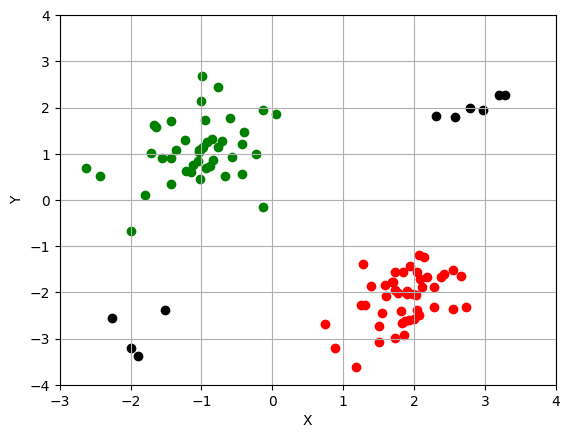

In [110]:
dt = pd.read_excel('0.xls', skiprows=1, header=None)
x = dt.iloc[:, 0].tolist()
y = dt.iloc[:, 1].tolist()

points = []
for i in range(len(x)):
  points.append((x[i], y[i]))
x1_1, y1_1 = 1, 3
x2_1, y2_1 = 0, -3
x1_2, y1_2 = 3, 0
x2_2, y2_2 = -3, -2

colors = []
cl1 = []
cl2 = []
anom = []

for i in range(len(x)):
  color_1 = check_point_position(x1_1, y1_1, x2_1, y2_1, x[i], y[i])
  color_2 = check_point_position(x1_2, y1_2, x2_2, y2_2, x[i], y[i])
  if color_1 == 'red' and color_2 == 'red':
    cl1.append(i)
  elif color_1 == 'blue' and color_2 == 'blue':
    cl2.append(i)
  else:
    anom.append(i)

point_1 = find(cl1, points)
point_2 = find(cl2, points)
center = []
center.append(point_1)
center.append(point_2)
print(get_ans(center))


X = []
Y = []
for i in range(len(cl1)):
  X.append(points[cl1[i]][0])
  Y.append(points[cl1[i]][1])
plt.scatter(X, Y, color='red')
X = []
Y = []
for i in range(len(cl2)):
  X.append(points[cl2[i]][0])
  Y.append(points[cl2[i]][1])

plt.scatter(X, Y, color='green')
X = []
Y = []
for i in range(len(anom)):
  X.append(points[anom[i]][0])
  Y.append(points[anom[i]][1])
plt.scatter(X, Y, color='black')
plt.xlim(-3, 4)
plt.ylim(-4, 4)
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.show()

(99895, 100091)


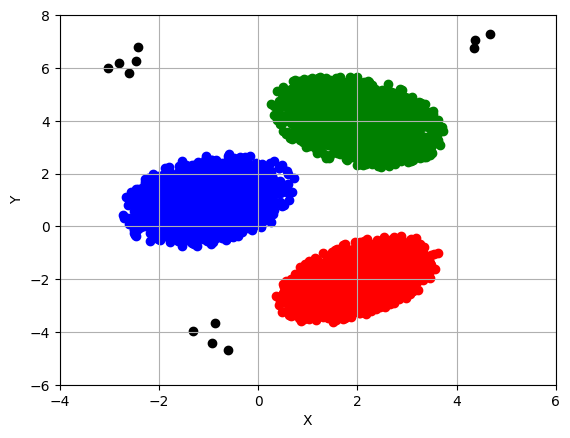

In [111]:
dt = pd.read_excel('1.xls', skiprows=1, header=None)
x = dt.iloc[:, 0].tolist()
y = dt.iloc[:, 1].tolist()
points = []
for i in range(len(x)):
  points.append((x[i], y[i]))

x1_1, y1_1 = 3, 0
x2_1, y2_1 = -2, 6
cl1, cl2, cl3, anom = DBScan(points)
cl4 = []

for i in range(len(cl2)):
  color_1 = check_point_position(x1_1, y1_1, x2_1, y2_1, points[cl2[i]][0], points[cl2[i]][1])
  if color_1 == 'red':
    cl3.append(cl2[i])
  elif color_1 == 'blue':
    cl4.append(cl2[i])

point_1 = find(cl1, points)
point_2 = find(cl3, points)
point_3 = find(cl4, points)
center = []
center.append(point_1)
center.append(point_2)
center.append(point_3)
print(get_ans(center))


X = []
Y = []
for i in range(len(cl1)):
  X.append(points[cl1[i]][0])
  Y.append(points[cl1[i]][1])
plt.scatter(X, Y, color='red')
X = []
Y = []
for i in range(len(cl4)):
  X.append(points[cl4[i]][0])
  Y.append(points[cl4[i]][1])

plt.scatter(X, Y, color='green')
X = []
Y = []
for i in range(len(cl3)):
  X.append(points[cl3[i]][0])
  Y.append(points[cl3[i]][1])
plt.scatter(X, Y, color='blue')
X = []
Y = []
for i in range(len(anom)):
  X.append(points[anom[i]][0])
  Y.append(points[anom[i]][1])
plt.scatter(X, Y, color='black')
plt.xlim(-4, 6)
plt.ylim(-6, 8)
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.show()

(515933, 498987)


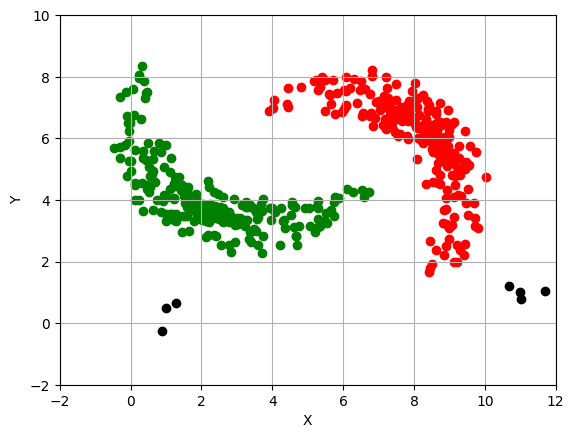

In [112]:
dt = pd.read_csv('2.txt', skiprows=1, delimiter=',', header=None)
x = dt.iloc[:, 0].tolist()
y = dt.iloc[:, 1].tolist()
points = []
for i in range(len(x)):
  points.append((x[i], y[i]))

cl1, cl2, cl3, anom = DBScan(points)

point_1 = find(cl1, points)
point_2 = find(cl2, points)
center = []
center.append(point_1)
center.append(point_2)
print(get_ans(center))


X = []
Y = []
for i in range(len(cl1)):
  X.append(points[cl1[i]][0])
  Y.append(points[cl1[i]][1])
plt.scatter(X, Y, color='red')
X = []
Y = []
for i in range(len(cl2)):
  X.append(points[cl2[i]][0])
  Y.append(points[cl2[i]][1])

plt.scatter(X, Y, color='green')
X = []
Y = []
for i in range(len(cl3)):
  X.append(points[cl3[i]][0])
  Y.append(points[cl3[i]][1])
plt.scatter(X, Y, color='blue')
X = []
Y = []
for i in range(len(anom)):
  X.append(points[anom[i]][0])
  Y.append(points[anom[i]][1])
plt.scatter(X, Y, color='black')
plt.xlim(-2, 12)
plt.ylim(-2, 10)
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.show()

(471077, 409201)


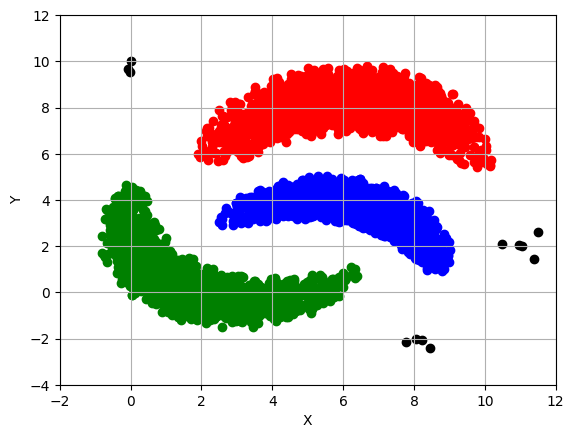

In [113]:
dt = pd.read_csv('3.txt', skiprows=1, delimiter=',', header=None)
x = dt.iloc[:, 0].tolist()
y = dt.iloc[:, 1].tolist()
points = []
for i in range(len(x)):
  points.append((x[i], y[i]))

cl1, cl2, cl3, anom = DBScan(points)

point_1 = find(cl1, points)
point_2 = find(cl2, points)
point_3 = find(cl3, points)
center = []
center.append(point_1)
center.append(point_2)
center.append(point_3)
print(get_ans(center))


X = []
Y = []
for i in range(len(cl1)):
  X.append(points[cl1[i]][0])
  Y.append(points[cl1[i]][1])
plt.scatter(X, Y, color='red')
X = []
Y = []
for i in range(len(cl2)):
  X.append(points[cl2[i]][0])
  Y.append(points[cl2[i]][1])

plt.scatter(X, Y, color='green')
X = []
Y = []
for i in range(len(cl3)):
  X.append(points[cl3[i]][0])
  Y.append(points[cl3[i]][1])
plt.scatter(X, Y, color='blue')
X = []
Y = []
for i in range(len(anom)):
  X.append(points[anom[i]][0])
  Y.append(points[anom[i]][1])
plt.scatter(X, Y, color='black')
plt.xlim(-2, 12)
plt.ylim(-4, 12)
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.show()

(528073, 71781)


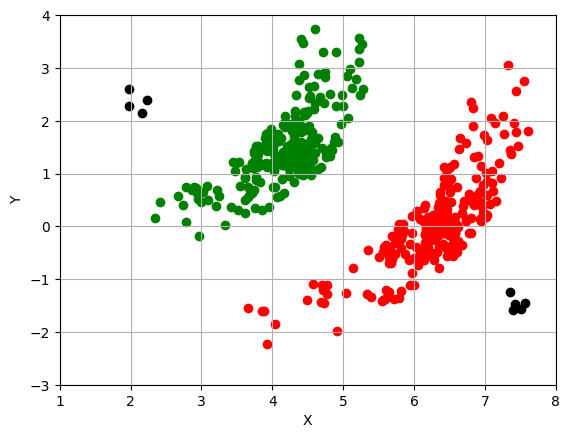

In [114]:
dt = pd.read_csv('4.txt', skiprows=1, delimiter=',', header=None)
x = dt.iloc[:, 0].tolist()
y = dt.iloc[:, 1].tolist()
points = []
for i in range(len(x)):
  points.append((x[i], y[i]))

cl1, cl2, cl3, anom = DBScan(points)

point_1 = find(cl1, points)
point_2 = find(cl2, points)
center = []
center.append(point_1)
center.append(point_2)
print(get_ans(center))

X = []
Y = []
for i in range(len(cl1)):
  X.append(points[cl1[i]][0])
  Y.append(points[cl1[i]][1])
plt.scatter(X, Y, color='red')
X = []
Y = []
for i in range(len(cl2)):
  X.append(points[cl2[i]][0])
  Y.append(points[cl2[i]][1])

plt.scatter(X, Y, color='green')
X = []
Y = []
for i in range(len(cl3)):
  X.append(points[cl3[i]][0])
  Y.append(points[cl3[i]][1])
plt.scatter(X, Y, color='blue')
X = []
Y = []
for i in range(len(anom)):
  X.append(points[anom[i]][0])
  Y.append(points[anom[i]][1])
plt.scatter(X, Y, color='black')
plt.xlim(1, 8)
plt.ylim(-3, 4)
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.show()

(669946, 370701)


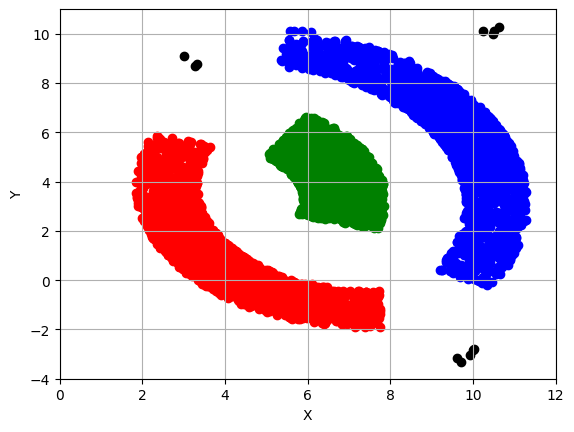

In [115]:
dt = pd.read_csv('5.txt', skiprows=1, delimiter=',', header=None)
x = dt.iloc[:, 0].tolist()
y = dt.iloc[:, 1].tolist()
points = []
for i in range(len(x)):
  points.append((x[i], y[i]))

cl1, cl2, cl3, anom = DBScan(points)

point_1 = find(cl1, points)
point_2 = find(cl2, points)
point_3 = find(cl3, points)
center = []
center.append(point_1)
center.append(point_2)
center.append(point_3)
print(get_ans(center))

X = []
Y = []
for i in range(len(cl1)):
  X.append(points[cl1[i]][0])
  Y.append(points[cl1[i]][1])
plt.scatter(X, Y, color='red')
X = []
Y = []
for i in range(len(cl2)):
  X.append(points[cl2[i]][0])
  Y.append(points[cl2[i]][1])

plt.scatter(X, Y, color='green')
X = []
Y = []
for i in range(len(cl3)):
  X.append(points[cl3[i]][0])
  Y.append(points[cl3[i]][1])
plt.scatter(X, Y, color='blue')
X = []
Y = []
for i in range(len(anom)):
  X.append(points[anom[i]][0])
  Y.append(points[anom[i]][1])
plt.scatter(X, Y, color='black')
plt.xlim(0, 12)
plt.ylim(-4, 11)
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.show()

# Кластеризация (1 за каждый алгоритм на всех данных)

На предложенных распределениях данных проверьте предложенные алгоритмы. Постройте графики кластеризации для каждой пары алгоритм-данные, разные кластеры покрасьте разным цветом. Воспользуйтесь sklearn реализациями. Параметры кластеризации для разных алгоритмов подберите такие, чтобы алгоритмы можно было сравнивать (по возможности одинаковое количество кластеров и т.д.)

In [ ]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

In [ ]:
two_means =
dbscan =

clustering_algorithms = (
        ("MeanShift", ms),
        ("Spectral\nClustering", spectral),
        ("Ward", ward),
        ("Agglomerative\nClustering", average_linkage),
        ("OPTICS", optics),
        ("Gaussian\nMixture", gmm),
    )

In [ ]:
np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(9 * 2 + 3, 13))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.95, wspace=0.05, hspace=0.01
)

plot_num = 1

default_base = {
    "quantile": 0.3,
    "eps": 0.3,
    "damping": 0.9,
    "preference": -200,
    "n_neighbors": 10,
    "n_clusters": 3,
    "min_samples": 20,
    "xi": 0.05,
    "min_cluster_size": 0.1,
}

datasets = [
    (
        noisy_circles,
        {
            "damping": 0.77,
            "preference": -240,
            "quantile": 0.2,
            "n_clusters": 2,
            "min_samples": 20,
            "xi": 0.25,
        },
    ),
    (noisy_moons, {"damping": 0.75, "preference": -220, "n_clusters": 2}),
    (
        varied,
        {
            "eps": 0.18,
            "n_neighbors": 2,
            "min_samples": 5,
            "xi": 0.035,
            "min_cluster_size": 0.2,
        },
    ),
    (
        aniso,
        {
            "eps": 0.15,
            "n_neighbors": 2,
            "min_samples": 20,
            "xi": 0.1,
            "min_cluster_size": 0.2,
        },
    ),
    (blobs, {}),
    (no_structure, {}),
]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params["quantile"])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params["n_neighbors"], include_self=False
    )
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    for name, algorithm in clustering_algorithms:
        t0 = time.time()